# Unit 4: Applied Machine Learning 2
## Task 4: Logistic regression
###### Candelaria Retamal
###### **22.06.2022**


#### 4.1. Train and evaluate a logistic regression
Train and evaluate a logistic regression model (without any regularization penalty="none" and without any hyperparameters tuning).

---

> **Solution**: I load the data first, for later fit a Logistic Regression model.

In [19]:
import numpy as np
import os

# Load data
with np.load("features_trainset.npz") as npz_file:
    X_tr = npz_file["data"]
    y_tr = npz_file["label"]

print("X:", X_tr.shape, X_tr.dtype)
print("y:", y_tr.shape, y_tr.dtype)

with np.load("features_testset.npz") as npz_file:
    X_te = npz_file["data"]
    y_te = npz_file["label"]

# print("X:", X_tr.shape, X_tr.dtype)
# print("y:", y_tr.shape, y_tr.dtype)

print("X:", X_te.shape, X_te.dtype)
print("y:", y_te.shape, y_te.dtype)

# Convert to float
X_tr = X_tr.astype(np.float)
X_te = X_te.astype(np.float)
# Print the new data type
print('dtype:', X_tr.dtype)
print('dtype:', X_te.dtype)

X: (280, 1280) float32
y: (280, 6) float32
X: (50, 1280) float32
y: (50, 6) float32
dtype: float64
dtype: float64


In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Create the estimator
logreg = LogisticRegression(penalty = "none")

# Fit it to train data
logreg.fit(X_tr, y_tr.argmax(axis=1))

# Accuracy on test set
accuracy = logreg.score(X_te, y_te.argmax(axis=1))
print('Accuracy: {:.3f}'.format(accuracy))

Accuracy: 0.940


The accuracy of the model is 94% without any regularization or hyperparamter.

#### 4.2. Get model coefficients
Get the model coefficients using the coef_ attribute of your estimator and visualize them using a heatmap.
* What are the largest 5 coefficients for each category (i.e. the indices of these coefficients)?
* Are these results consistent with your observations during the data exploration in the last question of Task 1?

---

> **Solution**: For each category I print the 5 largest coefficients. I plot as well the values from Task 1.

In [3]:
coefficients = logreg.coef_
cnt = 1
for i in range (0,len(coefficients)):
    idx=[]
    idx = (coefficients[i]).argsort()[:5]
    exec(f"list_{cnt} = idx")
    cnt = cnt+1

In [25]:
from itertools import zip_longest


header = ['BIKE', 'CAR', 'MOTORCYCLE',"OTHER","TRUCK","VAN"]

#width = 14
width = 10

row = ["  {:^{}}  ".format(item, width)
              for item in header]

print("|".join(row))

row = ["  " + "="*width + "  "
          for item in header]

print("|".join(row))


for row in zip_longest(list_1, list_2, list_3, list_4,list_5,list_6):

    # put empty string instead of `None`
    row = ["" if item is None else item
              for item in row]

    # format every item to the same length
    row = ["  {:{}}  ".format(item, width)
              for item in row]

    # join all items in row using `|` and display row
    print("|".join(row))

from itertools import zip_longest


header = ['OLD BIKE', 'OLD CAR', 'OLD MOTORCYCLE',"OLD OTHER","OLD TRUCK","OLD VAN"]

#width = 14
width = 10

print('\n') # skip line

row = ["  {:^{}}  ".format(item, width)
              for item in header]

print("|".join(row))

row = ["  " + "="*width + "  "
          for item in header]

print("|".join(row))

old_1 = [54, 1094, 183, 801, 148]
old_2 = [257, 660, 183, 291, 1098]
old_3 = [1120, 1122, 898, 505, 1043]
old_4 = [411, 279, 734, 529, 580]
old_5 = [1022, 714, 580, 335, 1051]
old_6 = [1022, 1104, 1113, 466, 893]

for row in zip_longest(old_1, old_2, old_3, old_4,old_5,old_6):

    # put empty string instead of `None`
    row = ["" if item is None else item
              for item in row]

    # format every item to the same length
    row = ["  {:{}}  ".format(item, width)
              for item in row]

    # join all items in row using `|` and display row
    print("|".join(row))

     BIKE     |     CAR      |  MOTORCYCLE  |    OTHER     |    TRUCK     |     VAN      
  ==========  |  ==========  |  ==========  |  ==========  |  ==========  |  ==========  
         580  |        1022  |         183  |         257  |         323  |         679  
         870  |         486  |         466  |         394  |         473  |         183  
         898  |        1223  |        1113  |         419  |        1029  |           1  
         699  |         389  |         411  |         861  |         925  |         440  
         466  |        1179  |         985  |         346  |         789  |          49  


   OLD BIKE   |   OLD CAR    |  OLD MOTORCYCLE  |  OLD OTHER   |  OLD TRUCK   |   OLD VAN    
  ==========  |  ==========  |  ==========  |  ==========  |  ==========  |  ==========  
          54  |         257  |        1120  |         411  |        1022  |        1022  
        1094  |         660  |        1122  |         279  |         714  |        1104  
    

To automatize the process, I define an intersection function, to find the repeated features between both classifiers. 

In [95]:
# Python program to illustrate the intersection
def intersection(lst1, lst2):
    lst3 = [value for value in lst1 if value in lst2]
    
    [(print('Intersection is: ' + str(i))) for i in lst3 if len(lst3)!=0]
    if not lst3: (print('Intersection is null'))
        

In [89]:
# Bikes and all the rest
intersection(list_1, old_1)
intersection(list_2, old_2)
intersection(list_3, old_3)
intersection(list_4, old_4)
intersection(list_5, old_5)
intersection(list_6, old_6)

Intersection is null
Intersection is null
Intersection is null
Intersection is null
Intersection is null
Intersection is null


In [90]:
# Bikes and all the rest
intersection(list_1, list_2)
intersection(list_1, list_3)
intersection(list_1, list_4)
intersection(list_1, list_5)
intersection(list_1, list_6)

Intersection is null
Intersection is: 466
Intersection is null
Intersection is null
Intersection is null


In [91]:
# Cars and all except bikes
intersection(list_2, list_3)
intersection(list_2, list_4)
intersection(list_2, list_5)
intersection(list_2, list_6)

Intersection is null
Intersection is null
Intersection is null
Intersection is null


In [92]:
# Motorcycle
intersection(list_3, list_4)
intersection(list_3, list_5)
intersection(list_3, list_6)

Intersection is null
Intersection is null
Intersection is: 183


In [93]:
# Other
intersection(list_4, list_5)
intersection(list_4, list_6)

Intersection is null
Intersection is null


In [94]:
# Truck
intersection(list_5, list_6)

Intersection is null


Intersection is not null just in two cases from different categories in different classifiers. This shows that some features can have different use and importance depending on what classifier is used.

#### 4.3. l2 regularization and strength parameters
Set an “l2” regularization and tune the regularization strength parameter of the model with cross-validated grid-search.

---

> **Solution**: I set a l2 regularization within the pipeline.

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Create pipeline
pipe = Pipeline(
    [("logreg", LogisticRegression(penalty = "l2",multi_class="ovr", solver="liblinear")),
    ]
)
from sklearn.model_selection import GridSearchCV
import numpy as np

# Create cross-validation object
grid = {"logreg__C": np.logspace(-5, 5, num=10)}
grid_cv = GridSearchCV(pipe, grid, cv=5, return_train_score=True)
# Fit estimator
grid_cv.fit(X_tr, y_tr.argmax(axis=1))

# Accuracy on test set
accuracy = grid_cv.score(X_te, y_te.argmax(axis=1))
print('Accuracy: {:.3f}'.format(accuracy))

import pandas as pd

# Collect results in a DataFrame
cv_results = pd.DataFrame(grid_cv.cv_results_)

Accuracy: 0.980


The accuracy now increased up to 98%.

#### 4.4. Report the result of cross-validated grid-search
Report the result of cross-validated grid-search as a dataframe and interpret the result. In particular, briefly explain what are the mean_train_score, mean_test_score, std_train_score and std_test_score:
* How are they obtained?
* What do they measure?

---

> **Solution**: From the dataframe built before from results, I plot the requested values.

In [13]:
# Print a few interesting columns
cols = [
    "mean_test_score",
    "std_test_score",
    "mean_train_score",
    "std_train_score",
    "param_logreg__C",
]
cv_results[cols].sort_values("mean_test_score", ascending=False)

,mean_test_score,std_test_score,mean_train_score,std_train_score,param_logreg__C
3,0.896429,0.026245,0.997321,0.002187,0.021544
4,0.892857,0.025254,1.000000,0.000000,0.278256
5,0.889286,0.026245,1.000000,0.000000,3.593814
7,0.889286,0.026245,1.000000,0.000000,599.48425
8,0.889286,0.026245,1.000000,0.000000,7742.636827
9,0.889286,0.026245,1.000000,0.000000,100000.0
6,0.885714,0.029014,1.000000,0.000000,46.415888
2,0.846429,0.046015,0.927679,0.005923,0.001668
1,0.782143,0.020825,0.783036,0.006056,0.000129
0,0.685714,0.024223,0.698214,0.012500,0.00001


the mean_train_score and mean_test_score entries contain the mean scores on the train and validation sets for each combination of hyperparameters. In this case I use 10 different values of logreg_C for which the test and traning scores are computed. The best value of logreg__C is 0.021544.

#### 4.5. Train and validation curves
Plot the training and validation curves:
* Compare the accuracies to the non-regularized model above.
* Do the curves indicate overfitting?

---

> **Solution**: I plot both curves to see if there is overfitting.

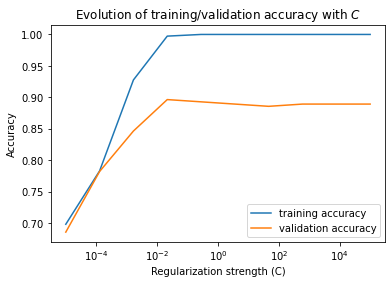

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt

# Plot training/validation accuracy curves
plt.semilogx(cv_results["param_logreg__C"], cv_results["mean_train_score"], label='training accuracy')
plt.semilogx(cv_results["param_logreg__C"], cv_results["mean_test_score"],  label='validation accuracy')
plt.xlabel('Regularization strength (C)')
plt.ylabel('Accuracy')
plt.title("Evolution of training/validation accuracy with $C$")
plt.legend()
plt.show()

Results indicate that regularization isn’t helpful in this case. There is no indication of overfitting.

#### 4.6. Classification report and confusion matrix 
Provide a classification report and visualize the confusion matrix of the test set.

---

> **Solution**: I print the confusion matrix and the classification report.

In [15]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
# Classification report
y_te_preds = grid_cv.predict(X_te)
print(classification_report(y_true=y_te.argmax(axis=1), y_pred=y_te_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.92      1.00      0.96        11
           2       1.00      1.00      1.00         9
           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00         7
           5       1.00      0.80      0.89         5

    accuracy                           0.98        50
   macro avg       0.99      0.97      0.97        50
weighted avg       0.98      0.98      0.98        50



In [16]:
from sklearn.metrics import confusion_matrix

# Confusion matrix
matrix = confusion_matrix(y_true=y_te.argmax(axis=1), y_pred=y_te_preds)

# Confusion matrix as a DataFrame
matrix_df = pd.DataFrame(
    matrix,
    columns=["pred: bike", "pred: car", "pred: motorcycle", "pred: other", "pred: truck", "pred: van"],
    index=["true: bike", "true: car","true: motorcycle", "true: other", "true: truck", "true: van"],
)

matrix_df

,pred: bike,pred: car,pred: motorcycle,pred: other,pred: truck,pred: van
true: bike,12,0,0,0,0,0
true: car,0,11,0,0,0,0
true: motorcycle,0,0,9,0,0,0
true: other,0,0,0,6,0,0
true: truck,0,0,0,0,7,0
true: van,0,1,0,0,0,4
